In [1]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note : Use the drive link for the processed dataset

In [2]:
!pip install gdown



import gdown

# Google Drive shareable link
url = "https://drive.google.com/drive/folders/1_gIkU3LIrOwU3c69VkOSd7b0qwACIPW7?usp=drive_link"  # Your actual file ID
output = "./data"
gdown.download(url, output, quiet=False)



/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1_gIkU3LIrOwU3c69VkOSd7b0qwACIPW7?usp=drive_link
To: /content/data
1.23MB [00:00, 1.41MB/s]


'./data'

In [3]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=e7b76dae31056a2ad17126b536d26f6a0e7d4ea88f625505744b7eb0d7b7ae7b
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [4]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/My Drive/DeepFakeDetection/data/Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/Celeb_real_face_only/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 3293
['/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/brlfypwhcj.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/clrdxzhlzn.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/aavyetamvt.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/chdbbbghqw.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/cxngwglwnw.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/aqgwyuaijx.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/cxdibrhrwz.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/cmsgfgmofg.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/abvgbvoxco.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/bgdhmiplel.mp4', '/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/

In [5]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/My Drive/DeepFakeDetection/data/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/My Drive/DeepFakeDetection/data/FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 144, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 126, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 145, 148, 148, 148, 148, 148, 148, 148, 139, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 134, 148, 148, 148, 148, 148, 148, 139, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [6]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [7]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  2617
test :  655
TRAIN:  Real: 1370  Fake: 1247


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


TEST:  Real: 351  Fake: 304


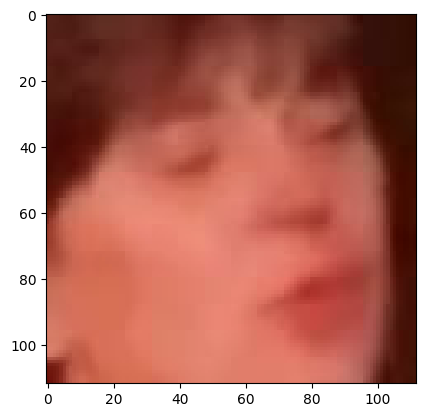

In [8]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/DeepFakeDetection/Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [9]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [10]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 197MB/s]


In [11]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [12]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [13]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[Epoch 1/20] [Batch 654 / 655] [Loss: 0.655965, Acc: 61.83%]Testing
[Batch 163 / 164]  [Loss: 0.565875, Acc: 71.30%]
Accuracy 71.29770992366412
[Epoch 2/20] [Batch 654 / 655] [Loss: 0.543445, Acc: 75.77%]Testing
[Batch 163 / 164]  [Loss: 0.503698, Acc: 75.27%]
Accuracy 75.26717557251908
[Epoch 3/20] [Batch 654 / 655] [Loss: 0.489425, Acc: 79.56%]Testing
[Batch 163 / 164]  [Loss: 0.429129, Acc: 80.92%]
Accuracy 80.91603053435115
[Epoch 4/20] [Batch 654 / 655] [Loss: 0.456840, Acc: 82.46%]Testing
[Batch 163 / 164]  [Loss: 0.411615, Acc: 82.75%]
Accuracy 82.74809160305344
[Epoch 5/20] [Batch 654 / 655] [Loss: 0.409498, Acc: 85.86%]Testing
[Batch 163 / 164]  [Loss: 0.416159, Acc: 83.36%]
Accuracy 83.3587786259542
[Epoch 6/20] [Batch 654 / 655] [Loss: 0.389016, Acc: 86.97%]Testing
[Batch 163 / 164]  [Loss: 0.370714, Acc: 83.21%]
Accuracy 83.20610687022901
[Epoch 7/20] [Batch 654 / 655] [Loss: 0.367498, Acc: 88.84%]Testing
[Batch 163 / 164]  [Loss: 0.420729, Acc: 82.44%]
Accuracy 82.44274809

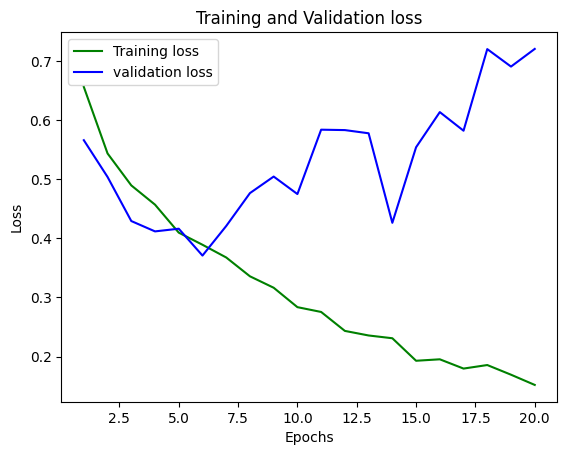

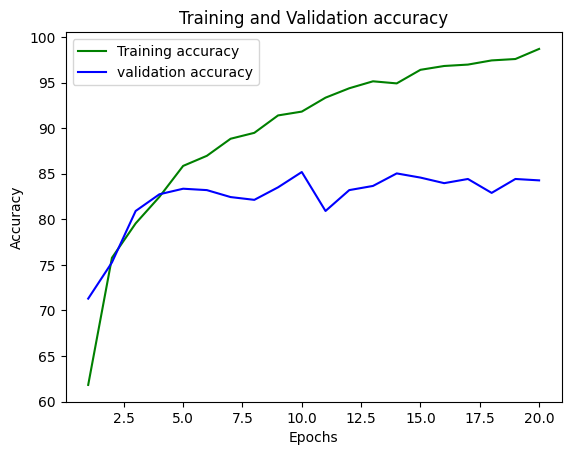

[[243  61]
 [ 42 309]]
True positive =  243
False positive =  61
False negative =  42
True negative =  309




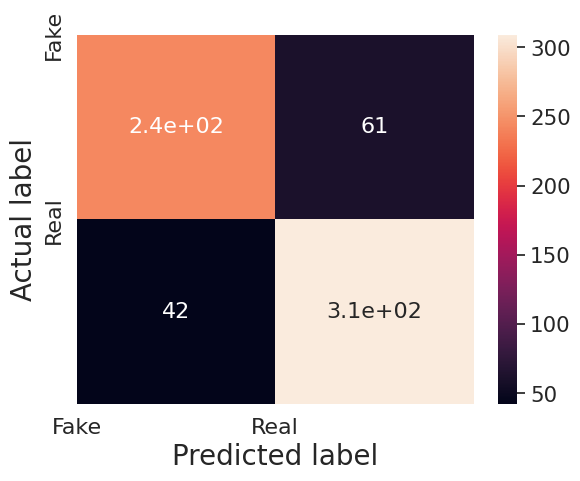

Calculated Accuracy 84.27480916030534


In [14]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 0.001#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 0.001)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

### **CLASSIFIES EACH FRAME**

In [15]:
import torch
import cv2
from torchvision import transforms
from google.colab import files
from PIL import Image

# Define your deepfake detection model class
class DeepFakeDetectionModel(torch.nn.Module):
    def __init__(self):
        super(DeepFakeDetectionModel, self).__init__()
        # Example model, use your trained model instead
        self.model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, 2)  # Binary classification (real vs fake)

    def forward(self, x):
        return self.model(x)

# Initialize and load your trained model
model = DeepFakeDetectionModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/DeepFakeDetection/checkpoint.weight'), strict=False)
  # Upload your model file to Colab
model.eval()  # Set model to evaluation mode

# Upload video file
uploaded = files.upload()

# Process the video file
video_file = list(uploaded.keys())[0]  # Get the video filename
cap = cv2.VideoCapture(video_file)

# Define transformations for input frames
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize to the model input size
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard ImageNet normalization
])

# Read and process frames from the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to PIL image and apply transformations
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_tensor = transform(pil_image).unsqueeze(0)  # Add batch dimension

    # Pass the frame through the model
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Print the prediction for each frame (real=0, fake=1)
    if predicted.item() == 0:
        print("Frame is Real")
    else:
        print("Frame is Fake")

# Clean up
cap.release()


Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 169MB/s]
<ipython-input-15-7a62f23c8872>:20: FutureWarning: You are using `torch.load` with `weights_onl

Saving DSC_7330.JPG to DSC_7330.JPG
Frame is Fake


# **CLASSIFIES WHETHER REAL OR FAKE**

In [16]:
import torch
import cv2
from torchvision import transforms
from google.colab import files
from PIL import Image

# Define your deepfake detection model class
class DeepFakeDetectionModel(torch.nn.Module):
    def __init__(self):
        super(DeepFakeDetectionModel, self).__init__()
        # Use pre-trained ResNet model and modify it for binary classification
        self.model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, 2)  # Binary classification (real vs fake)

    def forward(self, x):
        return self.model(x)

# Initialize and load your trained model
model = DeepFakeDetectionModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/DeepFakeDetection/checkpoint.weight'), strict=False)  # Load the model weights
model.eval()  # Set model to evaluation mode

# Upload video file
uploaded = files.upload()

# Process the video file
video_file = list(uploaded.keys())[0]  # Get the video filename
cap = cv2.VideoCapture(video_file)

# Define transformations for input frames
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize to the model input size
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard ImageNet normalization
])

# Variables to track frame predictions
real_count = 0
fake_count = 0
total_frames = 0

# Read and process frames from the video
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    total_frames += 1

    # Convert the frame to a PIL image and apply transformations
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    input_tensor = transform(pil_image).unsqueeze(0)  # Add batch dimension

    # Pass the frame through the model
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    # Count how many frames are classified as "Real" (0) and "Fake" (1)
    if predicted.item() == 0:
        real_count += 1
    else:
        fake_count += 1

# Determine if the video is real or fake based on majority frame classification
if real_count > fake_count:
    print("The video is Real")
else:
    print("The video is Fake")

# Clean up
cap.release()

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
<ipython-input-16-0ce4e36ee0fe>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

Saving DSC_7330.JPG to DSC_7330 (1).JPG
The video is Fake


##### **CONFUSION MATRIX**

In [17]:
import torch
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

# Assuming you've defined your model earlier
class DeepFakeDetectionModel(torch.nn.Module):
    def __init__(self):
        super(DeepFakeDetectionModel, self).__init__()
        self.model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, 2)  # Binary classification (real vs fake)

    def forward(self, x):
        return self.model(x)

# Initialize and load your trained model
model = DeepFakeDetectionModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/DeepFakeDetection/checkpoint.weight'), strcit=False)  # Load the trained model
model.eval()  # Set model to evaluation mode

# Define transformations for the test data (similar to what was used in training)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize to the model input size
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Assuming your test data is in a directory (replace with your actual path)
test_data = datasets.ImageFolder('/content/drive/MyDrive/DeepFakeDetection/data', transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)  # Test data loader

# Variables to store actual labels and predictions
predictions = []
actuals = []

# Evaluate the model on the test data
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Store predictions and actual labels
        predictions.extend(predicted.numpy())
        actuals.extend(labels.numpy())

# Generate the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally: Display confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
<ipython-input-17-2d2a741bacc0>:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

TypeError: Module.load_state_dict() got an unexpected keyword argument 'strcit'